In [68]:
import sys, os
pardir = os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir))
sys.path.append(pardir)

import numpy as np
import yaafelib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from read_labels import read_labels

%matplotlib inline

In [69]:
filename = '/mnt/data/Birdman/16khz/STHELENA-02_20140605_200000_1.wav'
sheets = read_labels('/mnt/data/Birdman/sthelena_labels.xls')
filename_noext = os.path.splitext(os.path.basename(filename))[0]
sheet = sheets[filename_noext]

sample_start = 0 * 60
sample_len = 200 # seconds
sample_end = sample_start + sample_len
step_size = 512 # no. of samples

In [70]:
rate, signal = wavfile.read(filename)
sample = signal[sample_start * rate:(sample_start + sample_len) * rate]

feature_plan = yaafelib.FeaturePlan(sample_rate=rate, normalize=True)
features_config_path = os.path.join(pardir, 'features.config') 
success = feature_plan.loadFeaturePlan(features_config_path)
engine = yaafelib.Engine()
engine.load(feature_plan.getDataFlow())
feats = engine.processAudio(sample.reshape(1, -1).astype('float64'))

In [71]:
condition = (sheet['Time Start'] > sample_start) & (sheet['Time End'] < sample_end)
sheet_sample = sheet[condition]

In [72]:
print('No. of calls: {}'.format(len(sheet_sample)))
sheet_sample

No. of calls: 25


,Date,File Name,Type of Call,Time Start,Time End,Species,Notes
0,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,2.905,4.197,Storm Petrel,NaN
1,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,10.008,11.622,Storm Petrel,NaN
2,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,14.527,16.464,Storm Petrel,NaN
3,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,17.110,18.724,Storm Petrel,NaN
4,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,20.338,21.307,Storm Petrel,NaN
5,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,34.220,34.866,Storm Petrel,NaN
6,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,47.134,52.944,Storm Petrel,NaN
7,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,60.692,61.984,Storm Petrel,NaN
8,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,64.889,66.826,Storm Petrel,NaN
9,2014-06-05,STHELENA-02_20140605_200000_1,Flight Call,67.472,68.763,Storm Petrel,NaN


In [61]:
def plot_feature(feature, audio_len, start=0, title='', sheet=None):
    x_spacing = np.linspace(start, start+audio_len, len(feature))
    if feature.ndim == 2 and feature.shape[1] > 1:
        no_figures = feature.shape[1]
        f, ax = plt.subplots(no_figures, 1, sharex=True, figsize=(15,20))
        plt.suptitle(title, fontsize=32, y=0.93)
        for idx in range(no_figures):
            ax[idx].plot(x_spacing, feature[:, idx])
            ax[idx].set_title(f'{title}_{idx}')
            if sheet is not None:
                plot_feature_location(ax[idx], sheet)
    else:
        plt.figure(figsize=(15,5))
        plt.plot(x_spacing, feature)
        plt.title(title, fontsize=32)
        if sheet is not None:
            plot_feature_location(sheet)
        
def plot_spectrogram(feature, audio_len, title=''):
    C = np.flipud(np.log10(feature.T))
    plt.figure(figsize=(15,5))
    plt.title(title, fontsize=32)
    plt.imshow(C, interpolation='nearest', aspect='auto')

# def plot_feature(feature, start=0, sheet=None):
# #    cutoff = 5 # to counter edge effects when calculatig derivatives
# #    feature = feature[cutoff:-cutoff,:]
#     x_spacing = np.linspace(sample_start, sample_start+sample_len, len(feature))
    
#     if feature.ndim == 2 and feature.shape[1] > 1:
#         no_figures = feature.shape[1]
#         f, ax = plt.subplots(no_figures, 1, sharex=True, figsize=(15,15))
#         for idx in range(no_figures):
#             ax[idx].plot(x_spacing, feature[:, idx])
#             if sheet is not None:
#                 plot_feature_location(ax[idx], sheet)
#     else:
#         plt.figure(figsize=(15,5))
#         plt.plot(x_spacing, feature)
#         if sheet is not None:
#             plot_feature_location(plt, sheet)

def plot_feature_location(sheet):
    for index, row in sheet.iterrows():
        if row['Species'] == 'Storm Petrel':
            axis.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='red', alpha=0.1)
        else:
            axis.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='green', alpha=0.1)

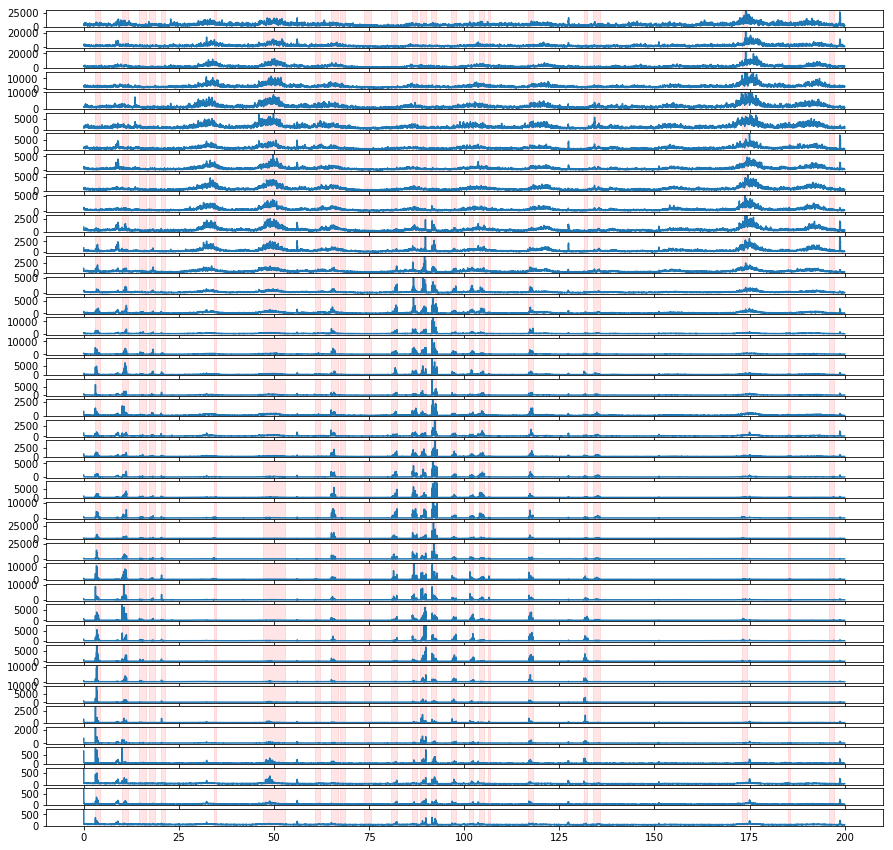

In [66]:
plot_feature(feats['MelSpectrum'], start=sample_start, sheet=sheet_sample)

In [ ]:
sheet_sample

In [10]:
feats.keys()

dict_keys(['SpectralRolloff', 'SpectralCrestFactorPerBand', 'LSF_d2', 'MelSpectrum', 'SpectralSlope', 'Energy', 'LSF', 'SpectralFlatnessPerBand', 'ComplexDomainOnsetDetection', 'LSF_d1', 'SpectralFlux', 'SpectralDecrease'])

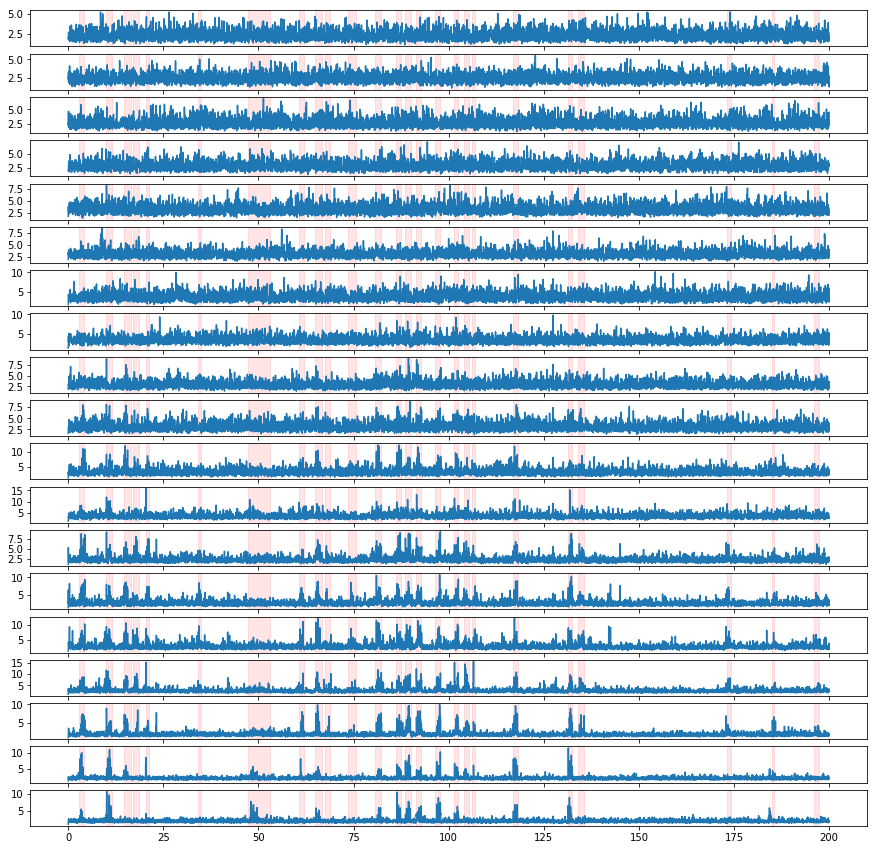

In [74]:
plot_feature(feats['SpectralCrestFactorPerBand'], start=sample_start, sheet=sheet_sample)

In [34]:
type(x[:,0])

numpy.ndarray

In [36]:
x.ndim

2

In [59]:
feats['SpectralRolloff'].shape

(6250, 1)